In [1]:
from data_processing import read_data, split_data, visualize_data
from classification_models import MLP, Logistic

import warnings
%matplotlib inline

In [2]:
warnings.filterwarnings('ignore')

## Dataset:
Function ***read_data*** is used to read the data from the file located at the path provided. Here, I have used the ***vehicles.csv*** dataset.

In [3]:
X, y, class_map, _, _ = read_data('../../datasets/vehicles.csv')

## Visualizing the Data:
The data is visualized using ***LDA*** (or ***PCA*** if required,) using the ***visualize_data*** function.

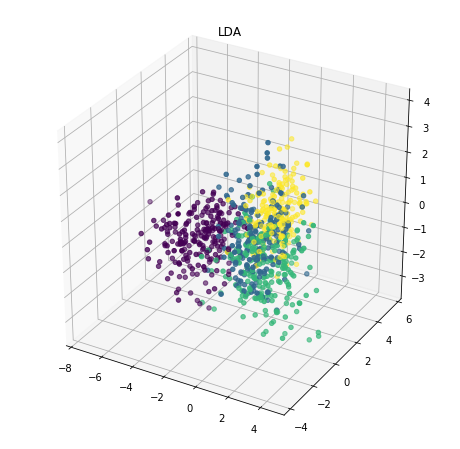

In [4]:
status = visualize_data('LDA', X, y)

## Data Split:
The dataset is split into ***training*** and ***testing*** datasets, where ***75%*** of the dataset is training data and ***25%*** is test data.

In [5]:
X_train, X_test, y_train, y_test = split_data(X, y)

## Multi Layer Perceptron:
### Model Details:
For the purpose of classifying the dataset, I have trained the ***MLP Classifier***, which has an architecture of 1 input, 1 hidden and 1 output layer of sizes 300, 200 and 150 respectively. The classifier uses ***ReLu*** activation function.

### Evaluation:
As part of the evaluation segment of this task, I have used shown multiple metrics for the classifier. These include metrics such as (but not limited to):
- Confusion Matrix
- Accuracy
- Precision
- Recall
- F1 Score

,f1-score,precision,recall,support
0,0.950495,0.960000,0.941176,51.000000
1,0.594595,0.660000,0.540984,61.000000
2,0.633333,0.575758,0.703704,54.000000
3,0.934783,0.934783,0.934783,46.000000
accuracy,0.764151,0.764151,0.764151,0.764151
macro avg,0.778301,0.782635,0.780162,212.000000
weighted avg,0.763894,0.770334,0.764151,212.000000


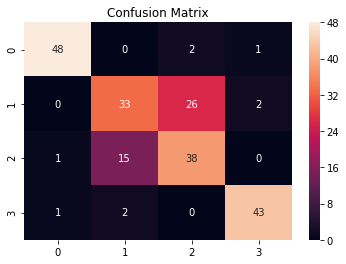

In [6]:
mlp_model = MLP(hidden_size = (300, 200, 150))
mlp_model.train(X_train, y_train)
mlp_model.validate(X_test, y_test)
mlp_report = mlp_model.show_report()
mlp_confusion = mlp_model.confusion_matrix()

## Logistic Regression:
### Model Details:
I have also trained ***Logistic Regression Classifier***, that uses the ***newton-cg*** solver.

### Evaluation:
As part of the evaluation segment of this task, I have used shown multiple metrics for the classifier. These include metrics such as (but not limited to):
- Confusion Matrix
- Accuracy
- Precision
- Recall
- F1 Score

,f1-score,precision,recall,support
0,0.921569,0.921569,0.921569,51.000000
1,0.608696,0.648148,0.573770,61.000000
2,0.584071,0.559322,0.611111,54.000000
3,0.957447,0.937500,0.978261,46.000000
accuracy,0.754717,0.754717,0.754717,0.754717
macro avg,0.767945,0.766635,0.771178,212.000000
weighted avg,0.753362,0.754082,0.754717,212.000000


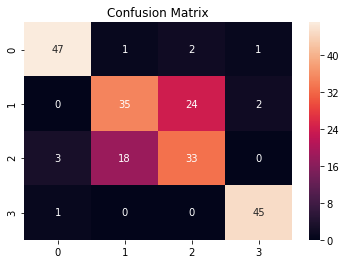

In [7]:
logistic_model = Logistic(solver='newton-cg', multi_class='multinomial')
logistic_model.train(X_train, y_train)
logistic_model.validate(X_test, y_test) 
logistic_report = logistic_model.show_report()
logistic_confusion = logistic_model.confusion_matrix()